

<h3><center>Introduction to building a quant pricing library</center></h3>
<h1><center>Finite-Difference Methods for Diffusion Equations</center></h1>
<h3><center>Abdulwahab, Animoku</center></h3>
<h4><center>26 March, 2025</center></h4>

# Outline:


<b>Introduction</b>
* Classification of PDEs
* Finite Differences

<b>Finite Difference Methods for Parabolic PDEs</b>
    
* An Explicit Method
* An Implicit Method
* Crank-Nicolson Method



# Classification of PDEs
It was found that the value $V = V (S, t)$ for European options must satisfy the
equation 
  $$ \frac{\partial V}{\partial t} + \frac{1}{2}\sigma^2 S^2\frac{\partial V^2}{\partial S^2} + rS \frac{\partial V}{\partial S} - rV =0, \quad (1)$$ 
The Black-Scholes PDE in (1) has various mathematical classifications: it is
second-order, linear, and parabolic

It is customary to classify a linear (or a quasilinear) second-order PDE of the form
$$a \frac{\partial^2 u}{\partial x^2} + b \frac{\partial^2 u}{\partial x \partial y} + 
  \frac{\partial^2 u}{\partial y^2} + d \frac{\partial u}{\partial x}  + e \frac{\partial u}{\partial y} + fu + g = 0.  \quad (2)$$
  
* if $b^2 − 4ac > 0,$ then the equation (2) is called hyperbolic,
* if $b^2 − 4ac = 0,$ then the equation (2) is called parabolic,
* if $b^2 − 4ac < 0,$ then the equation (2) is called elliptic.  

# Canonical Forms

A typical example for an <b>elliptic PDE</b> is the <b>Laplace equation</b>,
$$ \frac{\partial u^2}{\partial x^2} +\frac{\partial u^2}{\partial y^2} = 0.$$

Here, $a = c = 1$ and $b = 0,$ so that $b^2 − 4ac = −4 < 0.$ 

The <b>wave equation</b>,
$$\frac{\partial u^2}{\partial t^2} − \rho^2 \frac{\partial u^2}{\partial x^2} = 0,$$
where $t$ represents time, and $\rho$ is a specific constant, is a typical example of a
<b>hyperbolic equation</b>, since the discriminant is $4 \rho^2 > 0.$ 


Finally, the <b>heat equation</b>, or the diffusion equation,
$$\frac{\partial u}{\partial t} = k \frac{\partial u^2}{\partial x^2},$$
is an example of a <b>parabolic equation</b>, where $t$ is the time and $k$ is a specific
constant.

### Well- Posed Problems
Roughly speaking, a PDE must be accompanied with either an initial condition or boundary conditions, or both in order to have a solution in some certain class of functions. For instance,
$$\frac{\partial u}{\partial t}  =\frac{\partial u^2}{\partial x^2}, 0 < x < 1, t > 0, $$
$$u(x, 0) = f(x), 0 \leq x \leq 1,$$
$$u(0, t) = a, u(1, t) = b, t \geq 0,$$
which is called an <b>initial boundary value problem</b>.



## Definition (Well-Posedness):
 A problem is called well-posed if
* there is a solution,
* the solution is unique,
* the solution depends continuously on the initial data.

In [1]:
import matplotlib.pyplot as plt

to_plot = [ {'data': [[0]*6, list(range(6))],
             'color':'r',
             'title':'Our interests'},
           {'data': [list(range(6))+[5]*6+list(range(6)), [0]*6+list(range(6))+[5]*6],
            'color' : 'g',
            'title' : 'Boundary and initial conditions'
           },] + [
           {'data': [[i]*6, list(range(6))],
            'color' : 'g',
            'title' : f'Step {5-i}'
           } for i in range(4,-1,-1)]
           

def my_illustration_plot(to_plot):
    fig,ax = plt.subplots(1)
    for x in to_plot:
        plt.scatter(*x['data'], s=300, c=x['color'])
        plt.title(x['title'])
#         plt.axis('on')
        plt.xlim(-1,6)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.xlabel("Time")
    plt.ylabel("Stock")
    plt.show()
    



## Overview

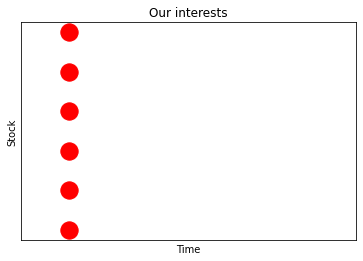

In [2]:
my_illustration_plot(to_plot[:1])

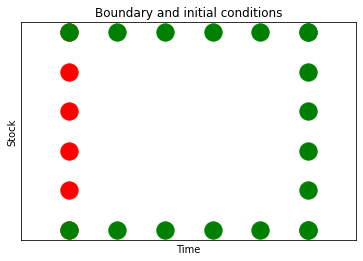

In [3]:
my_illustration_plot(to_plot[:2])

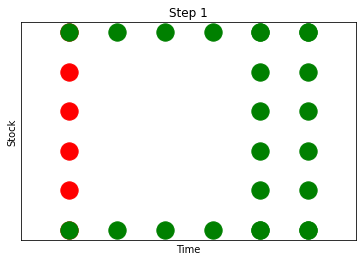

In [4]:
my_illustration_plot(to_plot[:3])

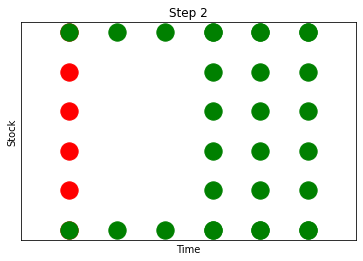

In [5]:
my_illustration_plot(to_plot[:4])

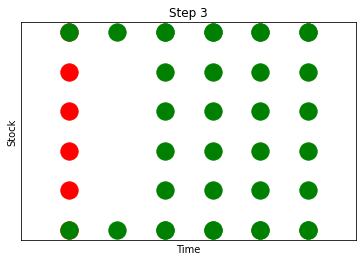

In [6]:
my_illustration_plot(to_plot[:5])

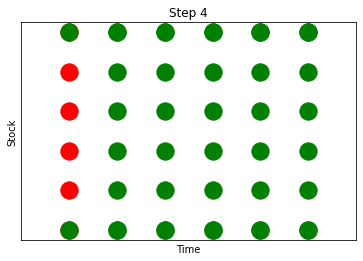

In [7]:
my_illustration_plot(to_plot[:6])

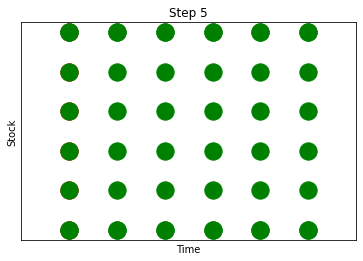

In [8]:
my_illustration_plot(to_plot[:7])

# Finite differences Formulae:

Under suitable continuity and differentiability hypotheses, Taylor’s theorem states
that a function f(x) may be expressed as
$$f(x ∓ h) = f(x) ∓ hf′(x) + \frac{1}{2}h^2 f′′(x) ∓ \frac{1}{6} h^3 f′′′(x) + O(h^4) $$
If the terms of order $h^2$ and higher are neglected, then the series gives:

$$f'(x) = \dfrac{f(x+h)-f(x)}{h} + O(h) \approx \dfrac{f(x+h)-f(x)}{h}  \quad (forward)$$

$$f'(x) = \dfrac{f(x)-f(x-h)}{h} + O(h) \approx  \dfrac{f(x)-f(x-h)}{h}  \quad (backward)$$



On the other hand, subtracting the Taylor series for $f(x + h)$ and $f(x − h)$,
we obtain another finite difference formula,

$$f'(x) = \dfrac{f(x+h)-f(x-h)}{2h}+ O(h^2)\approx  \dfrac{f(x+h)-f(x-h)}{2h} \quad (central)$$

In [9]:
from typing import Callable
def first_order_finite_diff(diff_type: str, x: float, h: float, my_func: Callable):
    """
    diff_type: str      ['forward', 'central', 'backward']
    x: float            Where the finite difference is calculated
    h: float            Step size of the finite difference
    my_func: Callable   Takes 1 float, returns 1 float
    """
    # TODO: Implement your finite differential function
    SHIFTS = {'forward': (0., 1.),
             'central': (-1., 1.),
             'backward': (-1., 0)}
    diff_lower = diff_type.lower()
    assert diff_lower in SHIFTS, f"The provided diff_type='{diff_type}' not in {SHIFTS}"
    assert h > 0, f"The provided h={h} <= 0."
    
    x_low, x_high = (x+h*shift for shift in SHIFTS[diff_lower])
    
    return (my_func(x_high)-my_func(x_low))/(x_high-x_low)
    
first_order_finite_diff("forward", 0, 1, lambda x: x*x+5)

1.0

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Illustrate the finite differences on any function
my_func = lambda x : np.square(x)+5
x0 = 1.0
h = 1.0

x = np.linspace(x0-1.2*h, x0+1.2*h, num=50)
f = my_func(x)

types = {"forward": (0., 1.), "central": (-1., 1.), "backward": (-1., 0.)}
slopes = {key:first_order_finite_diff(key, x0, h, my_func) for key in types.keys()}

data = [("f(x)", x, f),]
for name, shifts in types.items():
    x_values = np.array([x0+shifts[0]*h, x0+shifts[1]*h])
    y_values = my_func(x0)+slopes[name]*(x_values-x0)
    data.append((name, x_values, y_values))

<bound method Axes.plot of <AxesSubplot:>>

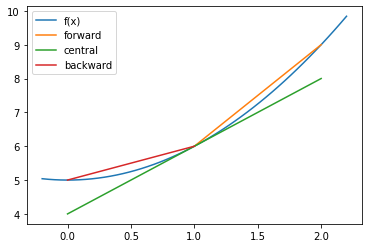

In [11]:
fig, ax = plt.subplots()
for label, x, y in data:
    ax.plot(x, y, label=label)
    
ax.legend()
ax.plot

# Extention to second order differences:
* Forward: $f''(x) \approx \dfrac{\dfrac{f(x+2h)-f(x+h)}{h}-\cfrac{f(x+h)-f(x)}{h}}{h} = \cfrac{f(x+2h)-2f(x+h)+f(x)}{h^2}$
* Central: $f''(x) \approx \dfrac{\dfrac{f(x+h)-f(x)}{h}-\cfrac{f(x)-f(x-h)}{h}}{h} = \cfrac{f(x+h)-2f(x)+f(x-h)}{h^2}$
* Backward: $f''(x) \approx \dfrac{\dfrac{f(x)-f(x-h)}{h}-\cfrac{f(x-h)-f(x-2h)}{h}}{h} = \cfrac{f(x)-2f(x-h)+f(x-2h)}{h^2}$

## Example: The heat equation:
* Consider the PDE.: $\dfrac{\partial U}{\partial t} = \dfrac{\partial ^2 U }{\partial x^2}$ or: $U_t=U_{xx}$,  $\quad 0<x<1, t>0$
* Boundary condition: $U(0,t) = U(1,t)=0, \quad t \geq 0 $ 
* Initial condition: $U(x,0) = U_0(x) \quad for \quad  0 \leq x \leq 1$

In [12]:
import numpy as np

def heat_simple_solution(x, t):
    return 10.*np.exp(-1.0*np.pi**2.*t)*np.sin(np.pi * x)

In [13]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt

def plot_2d(x_min_max_Nstep, y_min_max_Nstep, analytic_func=None, grid_values=None,
            labels={'x':'x', 'y':'t', 'z':'Value'}, z_lim=None):
    assert (analytic_func is not None or grid_values is not None), "Analytical function or grid_values needed as imput"
    for needed_label in ['x', 'y', 'z']:
        assert needed_label in labels, f"The {needed_label} is missing from {labels}"
    if grid_values is not None:
        exp_grid_shape = (y_min_max_Nstep[2], x_min_max_Nstep[2], )
        assert grid_values.shape == exp_grid_shape,\
                f"Incorrect Grid shape: expected: {exp_grid_shape}, actual: {grid_values.shape}"
    
    xs = np.linspace(*x_min_max_Nstep)
    ys = np.linspace(*y_min_max_Nstep)
    grid_x, grid_y = np.meshgrid(xs, ys)
    fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
    if analytic_func is not None:
        values = analytic_func(grid_x, grid_y)
        ax.plot_surface(grid_x, grid_y, values, cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=0.8)
    if grid_values is not None:
        ax.plot_surface(grid_x, grid_y, grid_values, cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=0.8)
    ax.set_xlabel(labels['x'], fontweight='bold')
    ax.set_ylabel(labels['y'], fontweight='bold')
    ax.set_zlabel(labels['z'], fontweight='bold')
    if z_lim is not None:
        ax.set_zlim(*z_lim)
    plt.show()
    if analytic_func is not None and grid_values is not None:
        diff = grid_values-values
        fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
        ax.plot_surface(grid_x, grid_y, diff, cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=0.8)
        ax.set_xlabel(labels['x'], fontweight='bold')
        ax.set_ylabel(labels['y'], fontweight='bold')
        ax.set_zlabel(labels['z'], fontweight='bold')
        ax.title.set_text("Diff")
        plt.show()

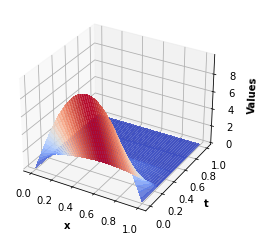

In [14]:
plot_2d((0., 1., 100), (0., 1., 5), heat_simple_solution, labels={'x':'x', 'y':'t', 'z':'Values'})

# TODO:
* Given: Initial condition $U(x, 0)$ 
* TODO: Find method for $U(x, t) \rightarrow U(x, t+\Delta t)$

## Create a grid as follows:
* Grid points: $u(x_j, t_n)$ or $u_{j,n}$ in short
* Grid partiion:
  * space: $x_0$=0, $x_1$, ... $x_J=1$, and $\Delta x := x_{i+1}-x_i = 1/J$
  * time: $t_0$=0, $t_1$, ... $t_N=T$, and $\Delta t := t_{i+1}-t_i = T/N$

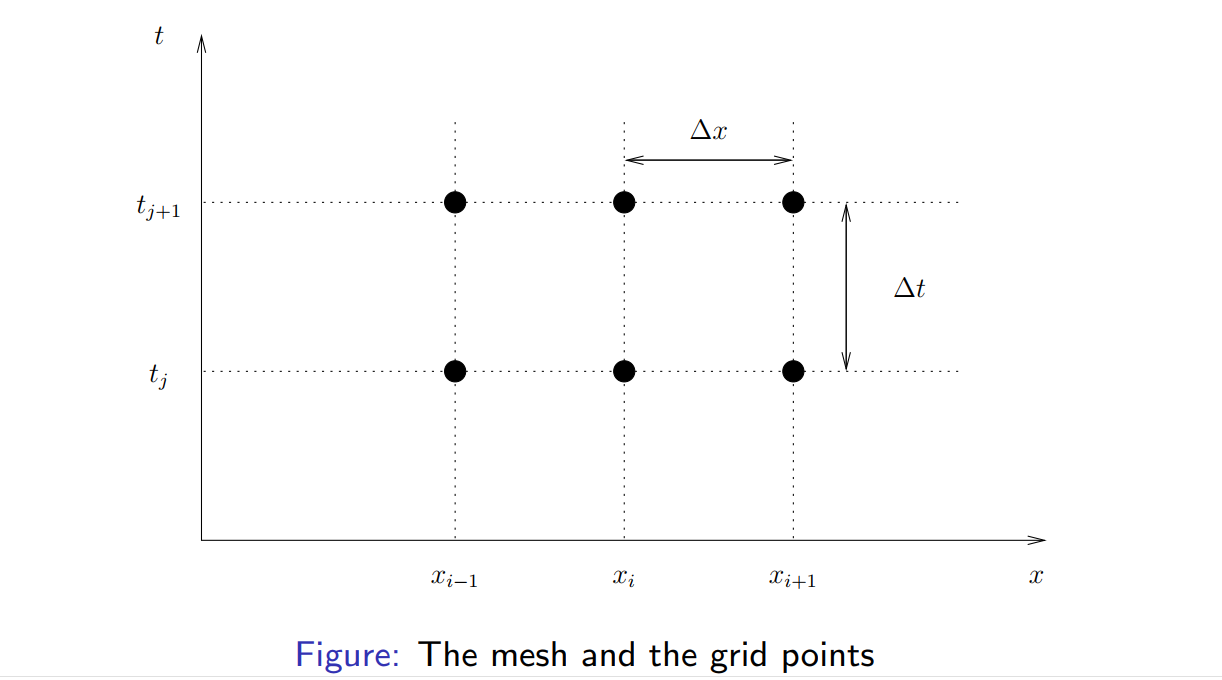

In [15]:
def get_my_heat_grid(J=20, N=20, T_max=1., initial_cond = lambda x: heat_simple_solution(x, 0)):
    """
    Returns a heat grid, space step size and time step size
    The grid is almost empty, only boundary and initial condition is initialized.
    J: int number of spacial steps
    N: int number of time steps
    initial_con: Callable float->float Returns the t=0 state
    """
    dx = 1./(J-1)
    dt = T_max/(N-1)
    
    grid = np.zeros(shape=(J, N), dtype=float)
    grid[:,0] = heat_simple_solution(np.linspace(0.,1.,J), 0)
    
    return {"grid": grid, "dx": dx, "dt": dt}

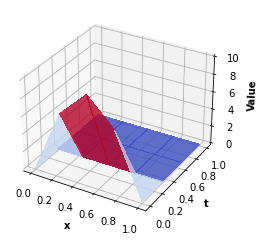

In [16]:
x_step = 5
t_step = 4
my_grid = get_my_heat_grid(x_step,t_step)["grid"]
# print(my_grid)

plot_2d((0, 1, x_step), (0, 1, t_step), grid_values=my_grid.T)

# Explicit method:
* **Forward** time difference
* Central space difference

$$U_t = U_{xx}$$
numerical diffs at $u(x_j, t_n)$:
$$\dfrac{u_{j, n+1}-u_{j, n}}{\Delta t} = \dfrac{u_{j+1, n}-2u_{j,n}+u_{j-1,n}}{\Delta x^2}$$

$$u_{j, n+1} = \left(1-2r\right) u_{j,n} + r(u_{j+1, n}+u_{j-1, n})$$

Where: $r = \Delta t/\Delta x^2$

$$ \underline{U}_{n+1} = \underline{\underline{M}}\cdot \underline{U}_n$$
Where:
* $M[j,j]=1-2r$,
* $M[j,j-1]=M[j, j+1]=r$

When $M$ is written out:
$$\left[
\begin{array}{cccccc}
1-2r & r & 0 & 0 & \ldots & 0\\
r & 1-2r & r & 0 & \ldots & 0\\
0 & r & 1-2r & r & \ldots & 0\\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & 0 & \ldots & 1-2r\\
\end{array}
\right]\cdot \underline{U}_n = \underline{U}_{n+1}$$

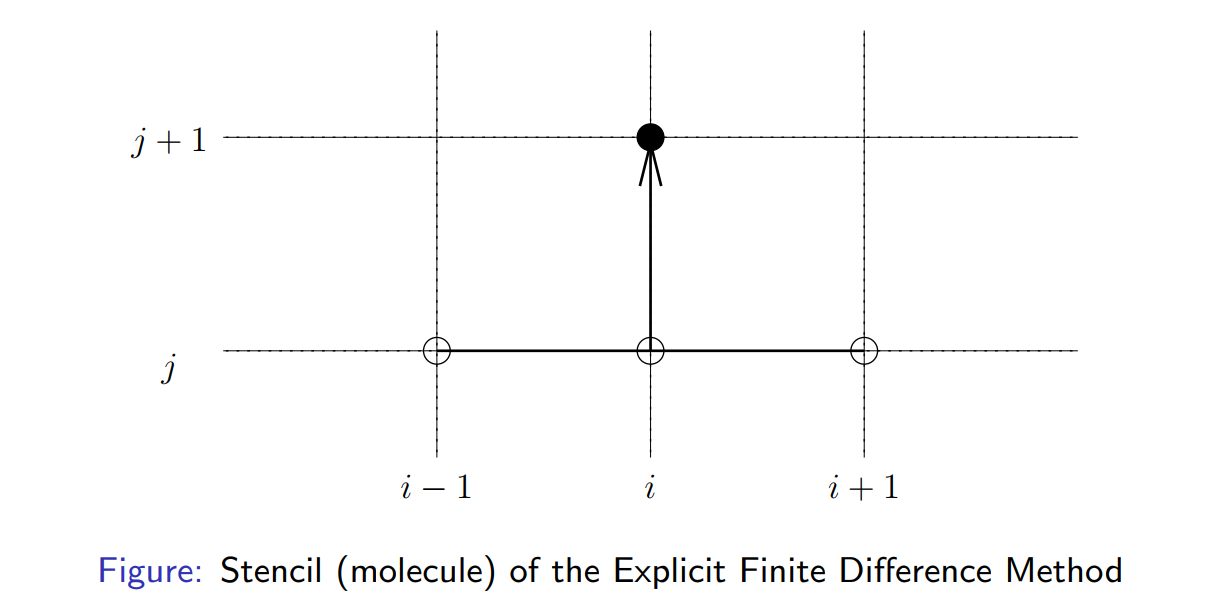

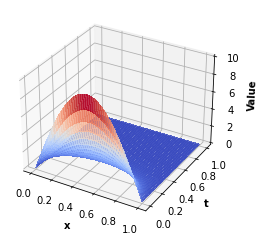

In [17]:
x_step = 100
t_step = 2*x_step**2

explicit = get_my_heat_grid(x_step, t_step)
explicit_grid = explicit["grid"]
explicit_dt = explicit["dt"]
explicit_dx = explicit["dx"]

#TODO: Implement your method
explicit_r = explicit_dt/explicit_dx**2.0
for n in range(0,explicit_grid.shape[1]-1):
    for j in range(1,explicit_grid.shape[0]-1):
        explicit_grid[j,n+1] = (1.-2.*explicit_r)*explicit_grid[j,n] + explicit_r * (
            explicit_grid[j+1,n]+explicit_grid[j-1,n])

# plot_2d((0, 1, x_step), (0, 1, t_step), analytic_func=heat_simple_solution, grid_values=explicit_grid.T, z_lim=(0,10.))
plot_2d((0, 1, x_step), (0, 1, t_step), grid_values=explicit_grid.T, z_lim=(0,10.))

# Implicit method:
* **Backward** time difference
* Central space difference

$$U_t = U_{xx}$$
numerical diffs at $u(x_j, t_n)$:
$$\dfrac{u_{j, n}-u_{j, n-1}}{\Delta t} = \dfrac{u_{j+1, n}-2u_{j,n}+u_{j-1,n}}{\Delta x^2}$$

$$\left(1+2r\right) u_{j,n} - r(u_{j+1, n}+u_{j-1, n}) = u_{j, n-1} $$

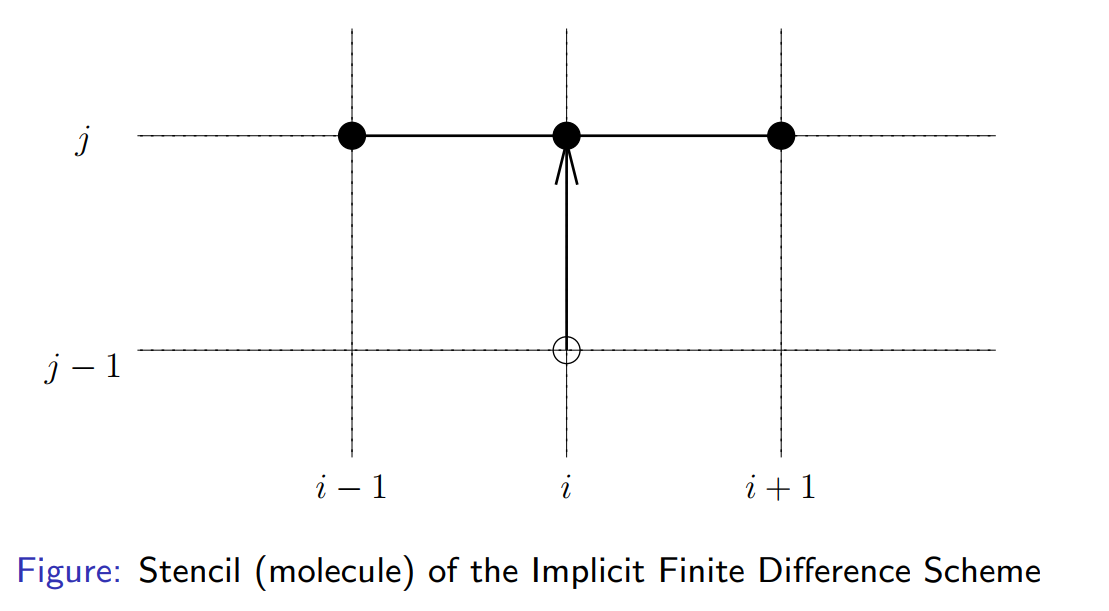

$$\underline{\underline{M}}\cdot \underline{U}_n = \underline {U}_{n-1}$$
Where:
* $M[j,j]=1+2r$,
* $M[j,j-1]=M[j, j+1]=-r$

when $M$ is written out:
$$\left[
\begin{array}{cccccc}
1+2r & -r & 0 & 0 & \ldots & 0\\
-r & 1+2r & -r & 0 & \ldots & 0\\
0 & -r & 1+2r & -r & \ldots & 0\\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & 0 & \ldots & 1+2r\\
\end{array}
\right]\cdot \underline{U}_n = \underline{U}_{n-1}$$

$$\underline{U}_n =\underline{\underline{M}}^{-1}\cdot \underline {U}_{n-1}$$

[np.linalg.solve()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve.html)

In [18]:
from scipy import linalg

x_step = 100
t_step = 2*x_step**2

implicit = get_my_heat_grid(x_step, t_step)
implicit_grid = implicit["grid"]
implicit_dx = implicit["dx"]
implicit_dt = implicit["dt"]
implicit_r = implicit_dt/implicit_dx**2.

#TODO: Implement your method
implicit_M = np.diag([1+2*implicit_r]*(x_step-2))-implicit_r*(np.diag([1.]*(x_step-3), -1)+np.diag([1.]*(x_step-3), +1))


for n in range(1, t_step):
    implicit_grid[1:-1,n] = linalg.solve(implicit_M, implicit_grid[1:-1,n-1], assume_a='sym')

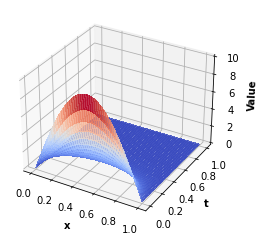

In [19]:
plot_2d((0, 1, x_step), (0, 1, t_step), grid_values=implicit_grid.T, z_lim=(0,10.))

## The boundary-condition:
$$\underline{\underline{M}}\cdot \underline{U}_n = \underline {U}_{n-1}$$
As a system of equations:
$$M[0,0]*U_n[0]+M[0,1]*U_n[1]+\ldots+M[0,J]*U_n[J] = U_{n-1}[0]$$
$$\vdots$$
$$M[J,0]*U_n[0]+M[J,1]*U_n[1]+\ldots+M[J,J]*U_n[J] = U_{n-1}[J]$$

But $U_n[0]$ and $U_n[J]$ are given by the boundary condition. We have to solve the equation system only for $U_n[i]$ for $i\in\{1, \ldots ,J-1\}$

Central space derivate is not calcable for $j=0$ and $j=N$. E.g. the first and the last equation is not true. Easier to see, when $M$ is written out:
$$\left[
\begin{array}{cccccc}
1+2r & -r & 0 & 0 & \ldots & 0\\
-r & 1+2r & -r & 0 & \ldots & 0\\
0 & -r & 1+2r & -r & \ldots & 0\\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & 0 & \ldots & 1+2r\\
\end{array}
\right]\cdot \underline{U}_n = \underline{U}_{n-1}$$

Due to the boundary conditions $U_n[0]=U_n[J]=U_{n-1}[0]=U_{n-1}[J]=0$ one can also omit the first and last column of $M$.

Therefore the equations to solve is:
$$\sum_{j\in\{1,\ldots,J-1\}}M[i,j]U_n[j]=U_{n-1}[i]$$
for $i \in\{1,\ldots,J-1\}$

# Crank-Nicolson method:
* Combine explicit and implicit method:
1. Take  explicit at $u(x_j, t_n)$:
$$\frac{u_{j, n+1}-u_{j, n}}{\Delta t} = \frac{u_{j+1, n}-2u_{j,n}+u_{j-1,n}}{\Delta x^2}$$
1. Take implicit at $u(x_j, t_{n+1})$:
$$\frac{u_{j, n+1}-u_{j, n}}{\Delta t} = \frac{u_{j+1, n+1}-2u_{j,n+1}+u_{j-1,n+1}}{\Delta x^2}$$
1. Average them:
$$\frac{u_{j, n+1}-u_{j, n}}{\Delta t} = \frac{1}{2}\left(\frac{u_{j+1, n}-2u_{j,n}+u_{j-1,n}}{\Delta x^2}+ \frac{u_{j+1, n+1}-2u_{j,n+1}+u_{j-1,n+1}}{\Delta x^2}\right)$$

$$\left(2+2r\right) u_{j,n+1} - r(u_{j+1, n+1}+u_{j-1, n+1}) = (2-2r)u_{j,n}+r(u_{j-1, n}+u_{j+1, n}) $$

$$\underline{\underline{M}}\underline{U}_{n+1}=\underline{\underline{A}}\underline{U}_{n}$$

$$\left(2+2r\right) u_{j,n+1} - r(u_{j+1, n+1}+u_{j-1, n+1}) = (2-2r)u_{j,n}+r(u_{j-1, n}+u_{j+1, n}) $$

$$\underline{\underline{M}}\underline{U}_{n+1}=\underline{\underline{A}}\underline{U}_{n}$$

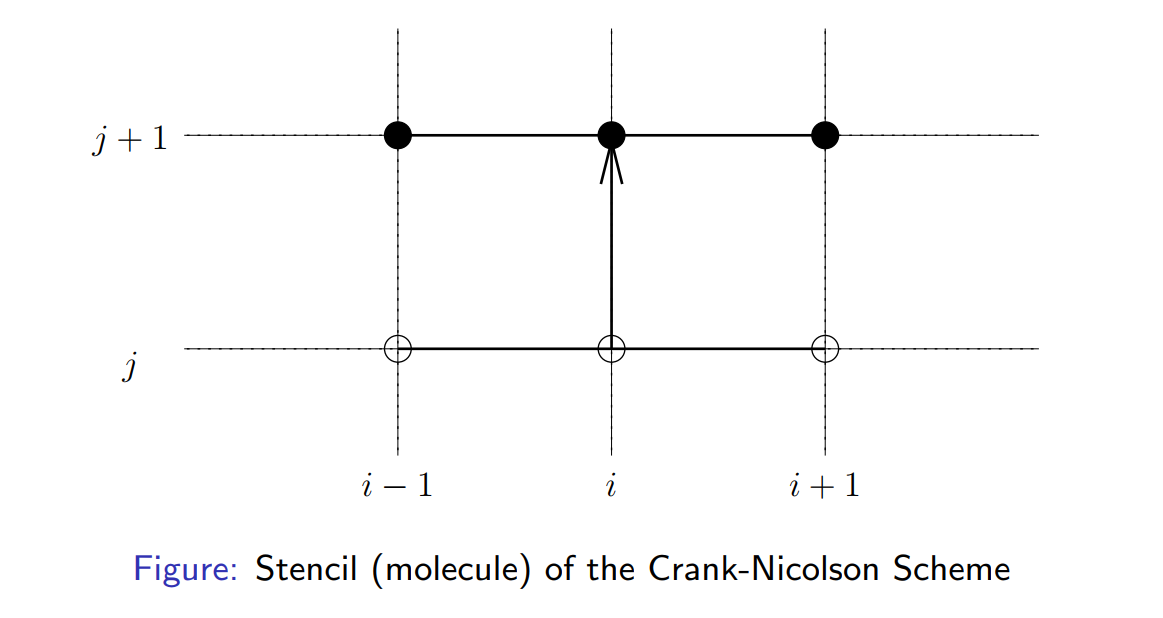

In [20]:
x_step = 100
t_step = 100

cn = get_my_heat_grid(x_step, t_step)
cn_grid = cn["grid"]
cn_dx = cn["dx"]
cn_dt = cn["dt"]
cn_r = cn_dt/cn_dx**2.

#TODO: Implement Crank-Nicolson method
cn_M = np.diag([2+2*cn_r]*(x_step-2))- cn_r*(np.diag([1.]*(x_step-3), -1)+np.diag([1.]*(x_step-3), +1))
cn_A = np.diag([2-2*cn_r]*x_step)    + cn_r*(np.diag([1.]*(x_step-1), -1)+np.diag([1.]*(x_step-1), +1))

for n in range(1, t_step):
    au = np.dot(cn_A, cn_grid[:,n-1])
    cn_grid[1:-1,n] = linalg.solve(cn_M, au[1:-1], assume_a='sym')

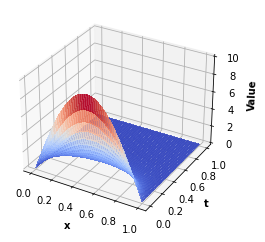

In [21]:
plot_2d((0, 1, x_step), (0, 1, t_step), grid_values=cn_grid.T, z_lim=(0,10.))

# Convergence Criteria

<center>
    
|                    | Explicit        | Implicit               | Crank-Nicolson        |
|:-------------------|:---------------:|:----------------------:|:---------------------:|
| Stable             | r $\leq$ 1/2    | always                 | always                |
| Numerically        | Simple          | Intensive ($M^{-1}$)   | Intensive ($M^{-1}$)  |
| Error ($\Delta u$) | O(k)+O(h$^2$)   | O(k)+O(h$^2$)          | O(k$^2$)+O(h$^2$)     | 
    
</center>

# Pricing

# Black-Scholes equation:
$$\frac{\partial V}{\partial t}+\frac 1 2 \sigma^2 S^2 \frac{\partial ^2 V}{\partial S^2} + rS\frac{\partial V}{\partial S}-rV = 0$$

<h2 align="center"> Look closer </h1>

$x=\log(S/S_0)$
$$-\frac{\partial V(x,t)}{\partial t} = \left[-r + (r-\frac{\sigma^2}{2})\frac{\partial}{\partial x} + \frac{\sigma^2}{2}\frac{\partial ^2}{\partial x^2}\right]V(x,t)$$


$x=\log(S/S_0)$
$$-\frac{\partial V(x,t)}{\partial t} = \left[-r + (r-\frac{\sigma^2}{2})\frac{\partial}{\partial x} + \frac{\sigma^2}{2}\frac{\partial ^2}{\partial x^2}\right]V(x,t)$$


$$-\frac{\partial V_j(t)}{\partial t} = \left[-r + (r-\frac{\sigma^2}{2})\frac{1}{\Delta x}\underline{\underline{D1}} + \frac{\sigma^2}{2}\frac{1}{\Delta x^2}\underline{\underline{D2}}\right]V_j(t)$$
Where:
* $D1_{j, j+1}=-D1_{j, j-1}=0.5$ (given $D1$ is central difference)
* $D2_{j, j-1}=D2_{j, j+1}=1$ and $D2_{j,j}=-2$

$$-\frac{\partial V_j(t)}{\partial t} = \left[-r + (r-\frac{\sigma^2}{2})\frac{1}{\Delta x}\underline{\underline{D1}} + \frac{\sigma^2}{2}\frac{1}{\Delta x^2}\underline{\underline{D2}}\right]V_j(t)$$

$$-\frac{\partial V_j(t)}{\partial t} = \underline{\underline{A_{BS}}}\cdot V_j(t)$$
Where:
* $A_{BS}=-r\mathbb{1} + \left(r-\frac{\sigma ^2}{2}\right)\frac{1}{\Delta x}\mathbb{D1} + \frac{\sigma^2}{2}\frac{1}{\Delta x^2}\mathbb{D2}$

In [22]:
#np.diag: https://numpy.org/doc/stable/reference/generated/numpy.diag.html

def get_d1(n):
    #First and last rows are incorrect, but they are given by boundary condition
    return 0.5*(np.diag(np.ones(n-1), 1)-np.diag(np.ones(n-1), -1))

def get_d2(n):
    #First and last rows are incorrect, but they are given by boundary condition
    return np.diag(np.ones(n-1), 1)+np.diag(-2.*np.ones(n))+np.diag(np.ones(n-1), -1)

def get_a(n, dx, r, sig):
    d = -1.*r*np.diag(np.ones(n))
    d1 = (r-0.5*sig**2.)/dx * get_d1(n)
    d2 = 0.5*sig**2./dx**2. * get_d2(n)
    return d+d1+d2

get_d1(4),"", get_d2(4), "", get_a(4, 0.8, 0.05, 0.0)

(array([[ 0. ,  0.5,  0. ,  0. ],
        [-0.5,  0. ,  0.5,  0. ],
        [ 0. , -0.5,  0. ,  0.5],
        [ 0. ,  0. , -0.5,  0. ]]),
 '',
 array([[-2.,  1.,  0.,  0.],
        [ 1., -2.,  1.,  0.],
        [ 0.,  1., -2.,  1.],
        [ 0.,  0.,  1., -2.]]),
 '',
 array([[-0.05   ,  0.03125,  0.     ,  0.     ],
        [-0.03125, -0.05   ,  0.03125,  0.     ],
        [ 0.     , -0.03125, -0.05   ,  0.03125],
        [ 0.     ,  0.     , -0.03125, -0.05   ]]))

## Call option boundary conditions:
* $V(S, T) = max(S-K, 0)$
* $V(0, t) = 0$ (Never exercised).
* $V(S_{max}, t) = S_{max}-K\exp(-r(T-t))$ (Always exercised -> It's a forward)

#### With $x=\log(S/K)$:
* $V(x, T) = K\max((e^x-1, 0))$
* $V(x_{min}, t) = 0$ (Never exercised).
* $V(x_{max}, t) = K(\exp(x_{max})-\exp(-r(T-t)))$ (Always exercised -> It's a forward)

In [17]:
#Practical infinity
np.exp(4)

54.598150033144236

In [24]:
from scipy.stats import norm

# Contract data
K =100
T = 2.

# Market data
R = 0.05
SIGMA = 0.12

"""The pricing function of European call option"""
def black_scholes_eur_call(S0, time_to_mat):
    d1_vec = ( np.log( S0 / K ) + ( R + 0.5 * SIGMA**2 ) * time_to_mat ) / ( SIGMA * time_to_mat**0.5 )
    d2_vec = d1_vec - SIGMA * time_to_mat**0.5

    N_d1_vec = norm.cdf(d1_vec)
    N_d2_vec = norm.cdf(d2_vec)

    return N_d1_vec * S0 - K * np.exp((-1.0)*R*time_to_mat) * N_d2_vec

In [28]:
def call_boundary(grid: np.ndarray, dx: float, dt: float):
    """
    Assume grid is lin. spaced and grid[:,-1] is t=T.
    """
    nx, nt = grid.shape
    grid[0, :]  = 0.
    grid[-1, :] = K*(np.exp(x_max) - np.exp(-R*(T-np.linspace(0.,T, nt))) )
    grid[:,-1] = K*(np.maximum(np.array([0]*nx), np.exp(np.linspace(x_min, x_max, nx))-1))
    
    return grid

# Model parameters
n_x = 6
n_t = 4
x_min, x_max = -4, 4

dx = (x_max-x_min)/(n_x-1)
dt = T/(n_t-1)

my_grid = np.zeros((n_x, n_t))
my_grid = call_boundary(my_grid, dx, dt)
my_grid

array([[   0.        ,    0.        ,    0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,  122.55409285],
       [   0.        ,    0.        ,    0.        , 1002.31763806],
       [5369.33126151, 5366.26430481, 5363.09339327, 5359.81500331]])

# Explicit:
* Backward time, central x differential:
$$-\frac{V_j(t)-V_j(t-\Delta t)}{\Delta t} =-\frac{\partial V_j(t)}{\partial t} = \mathbb{A}\cdot V_j(t)$$
$$V_{j}(t_{n-1})=\left[\Delta t \mathbb{A} +\mathbb{1}\right]V_{j}(t_n)$$

$\sigma \sqrt{\Delta t}\leq \Delta x$

In [29]:
def create_and_run_explicit_BS(n_x, n_t):
    dx = (x_max-x_min)/(n_x-1)
    dt = T/(n_t-1)
    # print(dt*SIGMA**2./dx**2.)
    
    explicit_grid = np.zeros((n_x, n_t))
    explicit_grid = call_boundary(explicit_grid, dx, dt)

    matrix = dt*get_a(n_x, dx, R, SIGMA) + np.diag(np.ones(n_x))
    
    for n in range(1, n_t)[::-1]:
        #Drop first and last rows
        explicit_grid[1:-1,n-1] = np.dot(matrix, explicit_grid[:,n])[1:-1]
        
    return explicit_grid

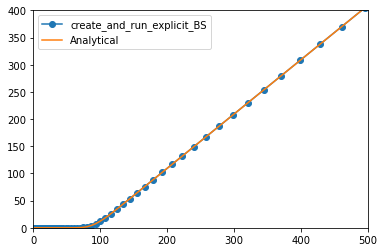

In [30]:
n_x, n_t = 111, 111
def create_run_plot(func):
    numeric_solution = func(n_x,n_t)
    Spots = np.exp(np.linspace(x_min, x_max, n_x))*K
    
    numeric_t0 = numeric_solution[:,0]
    analytic = black_scholes_eur_call(Spots, T)
    plt.plot(Spots, numeric_t0, "o-", label=func.__name__)
    plt.plot(Spots, analytic, label="Analytical")
    up_lim=5*K
    plt.xlim(0, up_lim)
    plt.ylim(0,up_lim-K)
    plt.legend()
    plt.show()
create_run_plot(create_and_run_explicit_BS)

# Implicit:
* Forward time, central x differential:
$$-\frac{V_j(t+\Delta t)-V_j(t)}{\Delta t} =-\frac{\partial V_j(t)}{\partial t} = \mathbb{A}\cdot V_j(t)$$
$$V_{j}(t_{n+1})=\left[\Delta t \mathbb{A} -\mathbb{1}\right]V_{j}(t_{n})$$
$$V_{j}(t_{n})=\left[\Delta t \mathbb{A} -\mathbb{1}\right]^{-1}V_{j}(t_{n+1})$$

In [22]:
def create_and_run_implicit_BS(n_x, n_t):
    dx = (x_max-x_min)/(n_x-1)
    dt = T/(n_t-1)
    
    implicit_grid = np.zeros((n_x, n_t))
    implicit_grid = call_boundary(implicit_grid, dx, dt)

    matrix = dt*get_a(n_x, dx, R, SIGMA)-np.diag(np.ones(n_x))
    
    for n in range(1, n_t)[::-1]:
        boundary = np.dot(matrix, implicit_grid[:,n-1])
#         print(boundary)
#         boundary = np.zeros(n_S)
        implicit_grid[1:-1,n-1] = linalg.solve(matrix[1:-1,1:-1], implicit_grid[1:-1,n]-boundary[1:-1])
        
    return implicit_grid

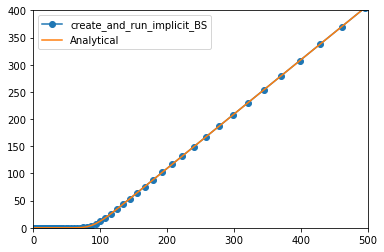

In [23]:
# n_x, n_t = 111, 111
create_run_plot(create_and_run_implicit_BS)

# General:
* Forward time, central x differential:
$$-\frac{V_j(t+\Delta t)-V_j(t)}{\Delta t} =\theta \mathbb{A} V_j(t+\Delta t) + (1-\theta)\mathbb{A}V_j(t)$$

$$V_{j}(t_{n})=\left(\mathbb{1}-(1-\theta)\Delta t\mathbb{A}\right)^{-1}\left(\mathbb{1} + \theta\Delta t\mathbb{A}\right)V_{j}(t_{n+1})$$

* $\theta=0$: Implicit
* $\theta=0.5$: Crank-Nicolson
* $\theta=1$: Explicit

In [24]:
def create_and_run_CN_BS(n_x, n_t):
    theta=0.5
    print(f"theta={theta}")
    dx = (x_max-x_min)/(n_x-1)
    dt = T/(n_t-1)
    
    cn_grid = np.zeros((n_x, n_t))
    cn_grid = call_boundary(cn_grid, dx, dt)

    matrix1 = (1.-theta)*dt*get_a(n_x, dx, R, SIGMA)-np.diag(np.ones(n_x))
    matrix2 = np.diag(np.ones(n_x)) + theta*dt*get_a(n_x, dx, R, SIGMA)
    
    for n in range(1, n_t)[::-1]:
        boundary = np.dot(matrix1, cn_grid[:,n-1])
        cn_grid[1:-1,n-1] = linalg.solve(matrix1[1:-1,1:-1], np.dot(matrix2, cn_grid)[1:-1,n]-boundary[1:-1])
        
    return cn_grid

theta=0.5


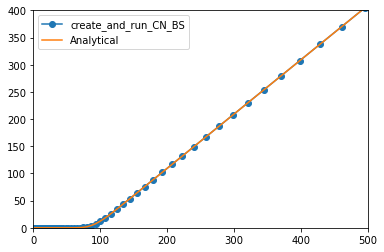

In [25]:
n_x, n_t = 111, 111
create_run_plot(create_and_run_CN_BS)

# Summary
### Pros
* The PDE solution only used:
  * Model parameters $(n_x, n_t)$
  * Market parameters (R, SIGMA)
  * No Contract information -> Payoff independent method
  
 * Contract info was only used in boundary and terminal conditions0 

# Summary
 ### Cons
 * Explicit sometimes not convergent
 * Implicit and CN numerically expensive
 * Addig further stock process is expensive

# Projects (30 pts):

Suppose $S_1(t)$ and $S_2(t)$ are independent stock processes with equal volatility. $S_1(0)=S_2(0)=100.$
The contract at maturity pays the value of the most expensive stock: $V(T)=\max_i\{S_1(T),S_2(T)\}.$
* What is the formula for the fair value of the contract, $V(0)$?         
* Derive the partial differential equation for this contract              
* Solve the resultant PDE using Finite Difference Method                   
* Compare the results obtained through solving the PDE with Monte Carlo Method  

# References:
[J. M. Schumacher: Introduction to Financial Derivatives, Open Press TiU](https://pure.uvt.nl/ws/files/51558907/INTRODUCTION_TO_FINANCIAL_DERIVATIVES.pdf)